# Tutorial on the dataset and basic functions

### Importing the libraries

In [1]:
import json
import sys
import pandas as pd
import collections 
import os
import numpy as np
from itertools import chain
from itertools import combinations
sys.path.insert(0, '..')
from src.experiment_utils.helper_classes import token, span, repository
from src.d02_corpus_statistics.corpus import Corpus
from definitions import ROOT_DIR
from pyannote.core import Segment

## Classes and data frame

### Data frame

All the information is now stored in a dataframe called "stat_df" containing the string of the directory path, the raw text, and all the annotations (in form of list of spans) starting with the curation followed by all annotators:

In [2]:
dataframe_dir = os.path.join(ROOT_DIR,'data/02_processed_to_dataframe', 'preprocessed_dataframe.pkl')
stat_df = pd.read_pickle(dataframe_dir)
stat_df.head()

,Policy,Text,Tokens,Article_State,Finished_Annotators,Curation,A,B,D,C,E,F,G
EU_32018R1999_Title_0_Chapter_3_Section_0_Article_15,,article 15\r\nlong-term strategies\r\n1. by ...,"[start:0 stop:7 text:article tag_count:0, star...",CURATION_FINISHED,"[A, B]",[span id:CUR0 annotator:Curation layer:Instrum...,[span id:A1 annotator:A layer:Instrumenttypes ...,[span id:B1 annotator:B layer:Instrumenttypes ...,,,,,
EU_32009L0028_Title_0_Chapter_0_Section_0_Article_19,,article 19\r\ncalculation of the greenhouse ga...,"[start:0 stop:7 text:article tag_count:0, star...",CURATION_FINISHED,"[A, C]",[span id:CUR89 annotator:Curation layer:Instru...,[span id:A82 annotator:A layer:Instrumenttypes...,,[],[span id:C1 annotator:C layer:Instrumenttypes ...,,,
EU_32009L0028_Title_0_Chapter_0_Section_0_Article_25,,article 25\r\ncommittees\r\n1. except in the...,"[start:0 stop:7 text:article tag_count:0, star...",CURATION_FINISHED,"[A, C]",[span id:CUR147 annotator:Curation layer:Polic...,[span id:A133 annotator:A layer:Policydesignch...,,[],[span id:C47 annotator:C layer:Policydesigncha...,,,
EU_32019L0944_Title_0_Chapter_2_Section_0_Article_09,,article 9\r\npublic service obligations\r\n1. ...,"[start:0 stop:7 text:article tag_count:0, star...",CURATION_FINISHED,"[A, C]",[span id:CUR159 annotator:Curation layer:Instr...,[span id:A147 annotator:A layer:Instrumenttype...,,[],[span id:C55 annotator:C layer:Instrumenttypes...,,,
EU_32019L0944_Title_0_Chapter_2_Section_0_Article_08,,article 8\r\nauthorisation procedure for new c...,"[start:0 stop:7 text:article tag_count:0, star...",CURATION_FINISHED,"[A, C]",[span id:CUR218 annotator:Curation layer:Instr...,[span id:A178 annotator:A layer:Instrumenttype...,,[],[span id:C79 annotator:C layer:Instrumenttypes...,,,


In [3]:
stat_df.shape

(448, 13)

The annotated spans in each article are stored in list and can be accessed as follows:

In [4]:
stat_df['Curation'][0]

[span id:CUR0 annotator:Curation layer:Instrumenttypes feature:InstrumentType tag:FrameworkPolicy start:12 stop:32 text:long-term strategies,
 span id:CUR1 annotator:Curation layer:Instrumenttypes feature:InstrumentType tag:FrameworkPolicy start:189 stop:207 text:long-term strategy,
 span id:CUR2 annotator:Curation layer:Instrumenttypes feature:InstrumentType tag:FrameworkPolicy start:478 stop:502 text:union long-term strategy,
 span id:CUR3 annotator:Curation layer:Instrumenttypes feature:InstrumentType tag:FrameworkPolicy start:627 stop:671 text:integrated national energy and climate plans,
 span id:CUR4 annotator:Curation layer:Instrumenttypes feature:InstrumentType tag:FrameworkPolicy start:677 stop:695 text:long-term strategy,
 span id:CUR5 annotator:Curation layer:Instrumenttypes feature:InstrumentType tag:FrameworkPolicy start:1265 stop:1293 text:union's long-term strategies,
 span id:CUR6 annotator:Curation layer:Instrumenttypes feature:InstrumentType tag:FrameworkPolicy start:

#### Accessing an annotated span
Each annotated span has a layer, feature, tag, start, stop, and the annotatet text (raw). See for example:

In [5]:
stat_df['Curation'][2][2]

span id:CUR149 annotator:Curation layer:Policydesigncharacteristics feature:Actor tag:Addressee_default start:117 stop:154 text:committee on renewable energy sources

Each annotated span further has a repository, list of all the tokens, and an annotator. 
The repository looks like this:

In [6]:
stat_df['Curation'][2][2].rep

policy:EU_32009L0028 title:Title_0 chapter:Chapter_0 section:Section_0 article:Article_25

Overlapping annotations are indicated by tag_count>1:

In [7]:
stat_df['Curation'][2][2].tokens

[start:117 stop:126 text:committee tag_count:1,
 start:127 stop:129 text:on tag_count:1,
 start:130 stop:139 text:renewable tag_count:2,
 start:140 stop:146 text:energy tag_count:2,
 start:147 stop:154 text:sources tag_count:2]

In [8]:
stat_df['Curation'][2][2].annotator

'Curation'

#### Tokens
It is important to note that the token objects reside in the separate column 'Tokens', the list of tokens for each span is just a pointer to those objects residing in the token column.

Each token has a start, stop, text and a tag_count. The tag_count counts how many times this specific token has been labeled.

In [9]:
stat_df['Tokens'][2][48]

start:254 stop:256 text:be tag_count:0

In [10]:
stat_df['Tokens'][2][:]

[start:0 stop:7 text:article tag_count:0,
 start:7 stop:8 text:  tag_count:0,
 start:8 stop:10 text:25 tag_count:0,
 start:12 stop:22 text:committees tag_count:1,
 start:24 stop:25 text:1 tag_count:0,
 start:25 stop:26 text:. tag_count:0,
 start:26 stop:29 text:    tag_count:0,
 start:29 stop:35 text:except tag_count:0,
 start:36 stop:38 text:in tag_count:0,
 start:39 stop:42 text:the tag_count:0,
 start:43 stop:48 text:cases tag_count:0,
 start:49 stop:57 text:referred tag_count:0,
 start:58 stop:60 text:to tag_count:0,
 start:61 stop:63 text:in tag_count:0,
 start:64 stop:73 text:paragraph tag_count:0,
 start:73 stop:74 text:  tag_count:0,
 start:74 stop:75 text:2 tag_count:0,
 start:75 stop:76 text:, tag_count:0,
 start:77 stop:80 text:the tag_count:0,
 start:81 stop:91 text:commission tag_count:1,
 start:92 stop:97 text:shall tag_count:0,
 start:98 stop:100 text:be tag_count:0,
 start:101 stop:109 text:assisted tag_count:0,
 start:110 stop:112 text:by tag_count:0,
 start:113 stop:1

### Conditional Repository
Repositories can be created trought the normal constructor **init**(self, policy, title, chapter, section, article), or trough the classmethod **from_repository_name**(cls, rep_str), taking a longer string of the repository name. 

The repository class can be used to create conditional repositories, which are helpful when working with all articles that match a certain condition. Let's create a test repository from a repository name:

In [11]:
test_dir = repository.from_repository_name("EU_32008R1099_Title_0_Chapter_0_Section_0_Article_03")
test_dir

policy:EU_32008R1099 title:Title_0 chapter:Chapter_0 section:Section_0 article:Article_03

Let's now create a conditional repository. On each level, we can match a certain condition by entering the respective name. We can also match all names by inserting 'None', where we match all repositorys with the attributes given other than 'None'. 
Let's assume we want to match all the annotated spans in 'EU_32008R1099', we would then create a repository like this:

In [12]:
test_dir = repository(policy = 'EU_32008R1099', title = None, chapter = None, section = None, article = None)
test_dir

policy:EU_32008R1099 title:None chapter:None section:None article:None

or equivalently like this:

In [13]:
test_dir = repository(policy = 'EU_32008R1099')
test_dir

policy:EU_32008R1099 title:None chapter:None section:None article:None

Let's create a conditional repository that matches all the spans that appear in the first articles in all the policies, titles, chapters and sections:

In [14]:
test_dir = repository(article = 'Article_01')
test_dir

policy:None title:None chapter:None section:None article:Article_01

## Evaluator class and evaluation functions

All the functions to calculate statistics are contained the class "Corpus", and it's only class member is the dataframe. The only constructor argument is a data frame created by the load data script (NLP_spark/src/d01_data/load_data.py). 

To start the evaluation process, a new object of the class "Corpus" must be created:

In [15]:
test_corpus = Corpus(stat_df)

In [16]:
test_corpus.df.shape

(412, 13)

By default, the preample ("Whereas" (recital) and "Front") articles are excluded. In case they should be included, initizialize the the test_corpus by setting front_and_whereas = True:

In [17]:
test_corpus_front_and_whereas = Corpus(stat_df, front_and_whereas = True)

In [18]:
test_corpus_front_and_whereas.df.shape

(448, 13)

### Droping articles

The corpus class allows to drop certain articles based on string matching, e.g., all the articles that **contain** given string(s) are dropped. The argument can be either passed as a single string or a list of strings.

In [19]:
matching_strings = ['front', 'Whereas']
test_corpus_front_and_whereas.drop_articles_based_on_string(matching_strings)

In [20]:
test_corpus_front_and_whereas.df.shape

(412, 13)

In [21]:
test_corpus_front_and_whereas.df.shape == test_corpus.df.shape

True

## Statistics

### Reading out the list of spans

The most important function for generating descriptive statistics is the member function get_span_list(self, conditional_rep, columns, item, value). This function takes a conditional repository (explained before), an item which can be either 'class, 'feature' or 'tag', and a value for that item. Consider for example the following item-value pairs: item = 'layer' and value = 'Policydesigncharacteristics', item = 'feature' and value ='Compliance', and item = 'tag' and value = 'Form_monitoring'. We can further select which annotators we want: 'all' for all annotators and curation, 'annotators' for all annotators, specific annotators in form of a list  (e.g ['A', 'B']) or a single annotator in form of a string (e.g. 'A').

All the other member functions are based on the Corpus.get_span_list member function, and they take the same inputs. 

The function returns a list of all the tags in all the paragraphs matching the conditional repository and matching the item and value given. For example, if one wants to match all the tags of type 'Policydesigncharacteristics' in the policy 'EU_32008R1099' as created by the annotators:

In [22]:
test_dir = repository('EU_32008R1099')
test_corpus.get_span_list(conditional_rep = test_dir, item = 'layer', value = 'Policydesigncharacteristics', 
                          annotators = 'annotators')

[span id:A1654 annotator:A layer:Policydesigncharacteristics feature:Compliance tag:Form_monitoring start:21 stop:38 text:energy statistics,
 span id:A1655 annotator:A layer:Policydesigncharacteristics feature:Compliance tag:Form_monitoring start:56 stop:78 text:consumption statistics,
 span id:A1656 annotator:A layer:Policydesigncharacteristics feature:Objective tag:Objective_QualIntention_noCCM start:100 stop:181 text:improving the quality of renewable energy and final energy consumption statistics,
 span id:A1657 annotator:A layer:Policydesigncharacteristics feature:Compliance tag:Form_monitoring start:125 stop:181 text:renewable energy and final energy consumption statistics,
 span id:A1658 annotator:A layer:Policydesigncharacteristics feature:Actor tag:Authority_monitoring start:187 stop:197 text:commission,
 span id:A1659 annotator:A layer:Policydesigncharacteristics feature:Actor tag:Authority_monitoring start:199 stop:207 text:eurostat,
 span id:A1660 annotator:A layer:Policyde

If one doesn't want to specify the item and the value, and instead wants to match all the annotated spans that match the conditional repository, one can leave those unspecified. Example for reading out the curation:

In [23]:
test_corpus.get_span_list(conditional_rep = test_dir, annotators = 'Curation')

[span id:CUR2403 annotator:Curation layer:Instrumenttypes feature:InstrumentType tag:RegulatoryInstr start:1343 stop:1363 text:regulatory procedure,
 span id:CUR2404 annotator:Curation layer:Instrumenttypes feature:InstrumentType tag:RegulatoryInstr start:1525 stop:1545 text:regulatory procedure,
 span id:CUR2405 annotator:Curation layer:Policydesigncharacteristics feature:Compliance tag:Form_monitoring start:21 stop:38 text:energy statistics,
 span id:CUR2406 annotator:Curation layer:Policydesigncharacteristics feature:Compliance tag:Form_monitoring start:43 stop:78 text:final energy consumption statistics,
 span id:CUR2407 annotator:Curation layer:Policydesigncharacteristics feature:Objective tag:Objective_QualIntention_noCCM start:100 stop:181 text:improving the quality of renewable energy and final energy consumption statistics,
 span id:CUR2408 annotator:Curation layer:Policydesigncharacteristics feature:Actor tag:Authority_monitoring start:187 stop:208 text:commission (eurostat),

### Distribution of spans by length

The function get_span_distro(self, conditional_rep, item, value, return_format) returns the distribution of spans of a tag_list either in dict{span:count} or list format. The lenght of the span can be calculated on character or token level:

In [24]:
test_corpus.get_span_distro(conditional_rep = test_dir, return_format = 'dict', level = 'character')

{10: 32,
 19: 17,
 20: 16,
 8: 14,
 13: 14,
 9: 14,
 17: 13,
 21: 12,
 11: 11,
 6: 10,
 18: 8,
 4: 8,
 15: 7,
 35: 6,
 27: 6,
 12: 6,
 7: 5,
 16: 4,
 25: 4,
 5: 4,
 31: 3,
 22: 3,
 23: 2,
 14: 2,
 24: 2,
 28: 2,
 45: 2,
 36: 2,
 81: 1,
 59: 1,
 58: 1,
 34: 1,
 99: 1,
 72: 1,
 76: 1,
 30: 1,
 108: 1,
 29: 1,
 42: 1,
 33: 1,
 86: 1}

In [25]:
test_corpus.get_span_distro(conditional_rep = test_dir, return_format = 'list')

[0,
 0,
 0,
 8,
 4,
 10,
 5,
 14,
 14,
 32,
 11,
 6,
 14,
 2,
 7,
 4,
 13,
 8,
 17,
 16,
 12,
 3,
 2,
 2,
 4,
 0,
 6,
 2,
 1,
 1,
 3,
 0,
 1,
 1,
 6,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

In [26]:
test_corpus.get_span_distro(conditional_rep = test_dir, return_format = 'dict', level = 'token')

{1: 98,
 2: 84,
 4: 18,
 3: 16,
 6: 6,
 5: 5,
 9: 4,
 7: 3,
 11: 2,
 10: 1,
 8: 1,
 13: 1,
 14: 1,
 12: 1,
 15: 1}

This span distribution can also be plottet:

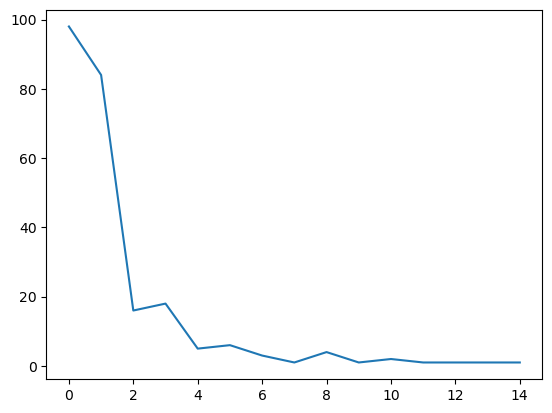

In [27]:
import matplotlib.pyplot as plt
plt.plot(test_corpus.get_span_distro(conditional_rep = test_dir, return_format = 'list', level = 'token'))
plt.show()

The function get_span_count(self, article, item, value) returns the number of spans in the span_list. This can be used to retrieve the amount of spans matching a certain condition, e.g. all those annotated with tags in the layer 'Policydesigncharacteristics' in the policy 'EU_32008R1099':


In [28]:
test_corpus.get_span_count(item = 'layer', value = 'Policydesigncharacteristics', conditional_rep = test_dir)

199

The function most_frequent_labeled_spans(self, conditional_rep, item, value) returns a dict of all the most frequent spans of a span_list:

In [29]:
test_corpus.most_frequent_labeled_spans(item = 'layer', value = 'Policydesigncharacteristics', conditional_rep = test_dir)

{'national statistics': 14,
 'commission': 13,
 'member states': 11,
 'statistics': 11,
 'energy statistics': 10,
 'eurostat': 10,
 'commission (eurostat)': 8,
 'final energy consumption statistics': 6,
 'annual': 6,
 'data': 6,
 'renewable energy statistics': 5,
 'nuclear statistics': 5,
 'community': 5,
 'decision 1999/468/ec': 3,
 'regulation (ec) no\xa0322/97': 3,
 'cost-benefit analyses': 2,
 'reported': 2,
 'reporting': 2,
 'monthly': 2,
 'short-term monthly': 2,
 'users': 2,
 'information': 2,
 'report': 2,
 'community statistics': 2,
 'improving the quality of renewable energy and final energy consumption statistics': 1,
 'annually': 1,
 'existing studies': 1,
 'feasibility pilot studies': 1,
 'evaluating': 1,
 'pilot studies': 1,
 'nuclear energy sector': 1,
 'from 2009 onwards': 1,
 '2009': 1,
 'reported period': 1,
 'time limits': 1,
 'member state': 1,
 'yearly': 1,
 '31 january of the second year following the reported period': 1,
 'committee': 1,
 'statistical programme c

The function get_tokens_from_span_list(self, conditional_rep, item, value) returns a list of all the tokens in a span list:

In [30]:
test_corpus.get_tokens_from_span_list(item = 'layer', value = 'Policydesigncharacteristics', conditional_rep = test_dir)

[start:1719 stop:1720 text:( tag_count:1,
 start:374 stop:384 text:commission tag_count:2,
 start:340 stop:350 text:regulation tag_count:1,
 start:197 stop:201 text:1999 tag_count:1,
 start:147 stop:156 text:following tag_count:1,
 start:110 stop:113 text:the tag_count:1,
 start:1902 stop:1912 text:commission tag_count:3,
 start:114 stop:121 text:quality tag_count:1,
 start:1851 stop:1857 text:within tag_count:2,
 start:48 stop:54 text:states tag_count:1,
 start:581 stop:589 text:eurostat tag_count:2,
 start:212 stop:213 text:( tag_count:1,
 start:185 stop:193 text:reported tag_count:1,
 start:213 stop:215 text:ec tag_count:1,
 start:110 stop:116 text:sector tag_count:1,
 start:489 stop:490 text:/ tag_count:1,
 start:716 stop:726 text:regulators tag_count:1,
 start:622 stop:632 text:statistics tag_count:2,
 start:215 stop:216 text:) tag_count:1,
 start:125 stop:134 text:renewable tag_count:1,
 start:598 stop:608 text:households tag_count:1,
 start:407 stop:416 text:community tag_count:

### Counting tokens and their annotations in span list

The function get_token_count_from_span_list returns the amount of tokens in the span_list:

In [31]:
test_corpus.get_token_count_from_span_list(item = 'layer', value = 'Policydesigncharacteristics', conditional_rep = test_dir)

382

The function most_frequent_labeled_tokens(self, conditional_rep, item, value) returns a dict of all the most frequent tokens of a span_list:

In [32]:
test_corpus.most_frequent_labeled_tokens(item = 'layer', value = 'Policydesigncharacteristics', conditional_rep = test_dir)

{'statistics': 56,
 'energy': 29,
 'commission': 23,
 'eurostat': 19,
 '/': 15,
 'the': 14,
 'national': 14,
 'and': 13,
 'of': 12,
 '(': 12,
 ')': 12,
 'member': 12,
 'states': 11,
 'community': 10,
 'ec': 9,
 'data': 8,
 'final': 7,
 'consumption': 7,
 'renewable': 6,
 'annual': 6,
 'nuclear': 6,
 'decision': 6,
 'reported': 4,
 'following': 4,
 'statistical': 4,
 'monthly': 4,
 'no': 4,
 '\xa0': 4,
 'regulation': 4,
 ',': 4,
 'studies': 3,
 'year': 3,
 '1999': 3,
 '468': 3,
 'months': 3,
 'for': 3,
 'monitoring': 3,
 'gas': 3,
 'producers': 3,
 'traders': 3,
 'distributors': 3,
 'transporters': 3,
 'importers': 3,
 'exporters': 3,
 '322': 3,
 '97': 3,
 'quality': 2,
 'pilot': 2,
 'cost-benefit': 2,
 'analyses': 2,
 'from': 2,
 '2009': 2,
 'period': 2,
 'time': 2,
 'committee': 2,
 'reporting': 2,
 'short-term': 2,
 '20th': 2,
 'day': 2,
 'its': 2,
 'publication': 2,
 'in': 2,
 '2005': 2,
 '166': 2,
 'mechanism': 2,
 'kyoto': 2,
 'protocol': 2,
 'users': 2,
 'information': 2,
 'date'

The function get_tokens_with_label_count(self, conditional_rep, label_count) return all the tokens based on a conditional rep that have a specific label_count:

In [33]:
test_corpus.get_tokens_with_label_count(conditional_rep = test_dir, label_count= 3)

[start:449 stop:458 text:mechanism tag_count:3,
 start:463 stop:473 text:monitoring tag_count:3,
 start:1902 stop:1912 text:commission tag_count:3,
 start:1914 stop:1922 text:eurostat tag_count:3,
 start:354 stop:363 text:producers tag_count:3,
 start:368 stop:375 text:traders tag_count:3,
 start:377 stop:389 text:distributors tag_count:3,
 start:394 stop:406 text:transporters tag_count:3,
 start:408 stop:417 text:importers tag_count:3,
 start:422 stop:431 text:exporters tag_count:3,
 start:166 stop:172 text:energy tag_count:3,
 start:173 stop:183 text:statistics tag_count:3,
 start:191 stop:200 text:community tag_count:3]

The function get_label_count_per_token_distro(self, conditional_rep, return_format) returns a distribution of the tag_count for all the tokens in a conditional repository. This can be used to evaluate how many tokens have been labeled once, twice and so on. The distribution is returned in either list or dict:

In [34]:
test_corpus.get_label_count_per_token_distro(conditional_rep = test_dir, return_format = 'dict')

{0: 1586, 1: 329, 2: 111, 3: 13, 4: 2}

In [35]:
test_corpus.get_label_count_per_token_distro(conditional_rep = test_dir, return_format = 'list')

[1586, 329, 111, 13, 2]

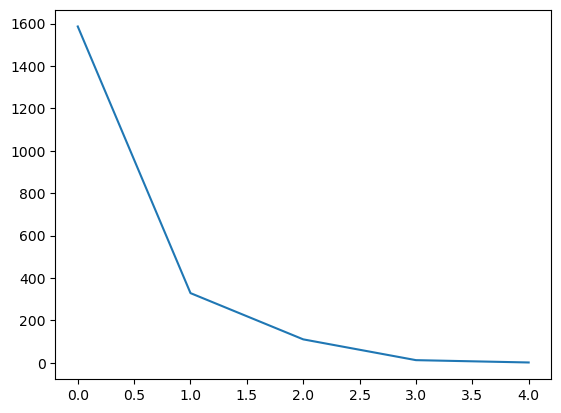

In [36]:
plt.plot(test_corpus.get_label_count_per_token_distro(conditional_rep = test_dir, return_format = 'list'))
plt.show()